In [184]:
import pandas as pd

In [185]:
df = pd.read_csv('../data/internet_service_churn_scaled.csv')

In [186]:
df_X = df.drop(['churn'], axis=1)
df_y = df['churn']

In [187]:
df_X.head()

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,reamining_contract,download_avg,upload_avg,download_over_limit
0,0.476083,-0.708273,4.684387,-0.537157,-0.556575,-0.192699,-0.208788
1,-2.100476,-0.708273,2.844086,-0.747446,-0.689055,-0.426943,-0.208788
2,0.476083,-0.708273,3.184517,-0.747446,-0.472986,-0.335282,-0.208788
3,-2.100476,-0.708273,2.178025,-0.747446,-0.689055,-0.426943,-0.208788
4,-2.100476,-0.708273,1.941204,-0.747446,-0.689055,-0.426943,-0.208788


### Тренування моделі

In [188]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=42)

In [189]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [190]:
pd.DataFrame(X_train_scaled).head()

,0,1,2,3,4,5,6
0,0.473481,-0.710619,1.658963,-0.750542,-0.669367,-0.416220,-0.207563
1,0.473481,1.407224,0.063254,1.230296,2.538404,1.156431,-0.207563
2,0.473481,-0.710619,-0.751785,0.810118,-0.329774,-0.297529,-0.207563
3,0.473481,-0.710619,-1.159304,-0.735536,-0.669367,-0.416220,-0.207563
4,0.473481,-0.710619,-0.241158,-0.750542,0.211738,0.206906,-0.207563


In [191]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=3)

In [192]:
X_test_scaled = scaler.transform(X_test)
y_pred_forest = tree.predict_proba(X_test_scaled)

In [193]:
y_pred_forest[:5]

array([[0.91671037, 0.08328963],
       [0.91671037, 0.08328963],
       [0.02417614, 0.97582386],
       [0.02417614, 0.97582386],
       [0.91671037, 0.08328963]])

In [194]:
y_pred_forest = tree.predict(X_test_scaled)
y_pred_forest[:5]

array([0., 0., 1., 1., 0.])

In [195]:
y_test.head()

50303    0.0
32197    0.0
35835    1.0
61761    1.0
35715    1.0
Name: churn, dtype: float64

In [196]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_forest))

              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93      9419
         1.0       0.95      0.93      0.94     12149

    accuracy                           0.94     21568
   macro avg       0.93      0.94      0.93     21568
weighted avg       0.94      0.94      0.94     21568



In [197]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.datasets import load_iris

# Завантажимо дані
data = load_iris()
X, y = X_train, y_train

# Ініціалізуємо StratifiedKFold з 5 фолдами
skf = StratifiedKFold(n_splits=5)

# Виконаємо крос-валідацію
scores = cross_val_score(tree, X, y, cv=skf)

# Виведемо результати
print("Крос-валідаційні оцінки для кожного фолду:", scores)
print("Середня оцінка:", scores.mean())


Крос-валідаційні оцінки для кожного фолду: [0.9336314  0.93502235 0.93581719 0.93224044 0.93313462]
Середня оцінка: 0.9339692001987083


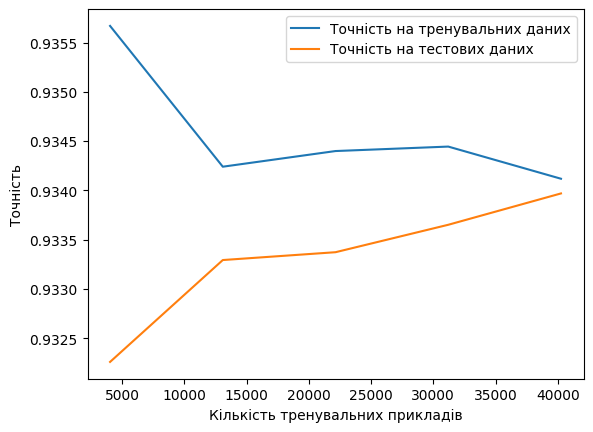

In [198]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(tree, X_train, y_train, cv=5)

train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, label="Точність на тренувальних даних")
plt.plot(train_sizes, test_scores_mean, label="Точність на тестових даних")
plt.xlabel("Кількість тренувальних прикладів")
plt.ylabel("Точність")
plt.legend()
plt.show()

In [199]:
import pickle

with open('../models/decision_tree.pkl', 'wb') as f:
    pickle.dump(tree, f)